In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_curve,roc_auc_score

In [127]:
c_df=pd.read_csv('creditcard.csv')
c_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [75]:
c_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [76]:
c_df.shape

(284807, 31)

In [128]:
c_df['Class']=c_df['Class'].astype(object)

{'whiskers': [<matplotlib.lines.Line2D at 0x8e0d8792b0>,
 'caps': [<matplotlib.lines.Line2D at 0x8e0d88eee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x8e0d88e550>],
 'medians': [<matplotlib.lines.Line2D at 0x8e0d10c640>],
 'fliers': [<matplotlib.lines.Line2D at 0x8e0d10c9d0>],
 'means': []}

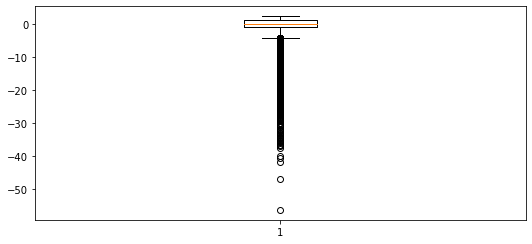

In [78]:
#Visualizing outlier in V1 column
plt.boxplot(c_df['V1'])

In [129]:
#Continous cols in dataset
con_cols=[col for col in c_df.columns if c_df[col].dtype=='int64' or c_df[col].dtype=='float64']

In [130]:
#Loop to detect and remove outliers in all cont cols
for col in con_cols:
    q1=c_df[col].quantile(0.25)
    q3=c_df[col].quantile(0.75)
    iqr=q3-q1
    lvo=q1-1.5*iqr
    hvo=q3+1.5*iqr
    c_df_out=c_df.loc[(c_df[col]>lvo) & (c_df[col]< hvo)]

In [131]:
#Clean dataset without outliers
c_df_out

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0


In [132]:
c_df_out['Class']=c_df_out['Class'].astype(int)

In [133]:
y=c_df_out['Class']
c_df_out.drop(columns='Class',inplace=True)

In [134]:
#Train Test split
x_train,x_test,y_train,y_test=train_test_split(c_df_out,y,random_state=42,test_size=0.2)

In [135]:
sc=StandardScaler()

for col in con_cols:
    x_train[col]=sc.fit_transform(np.array(x_train[col]).reshape(-1,1))
    x_test[col]=sc.transform(np.array(x_test[col]).reshape(-1,1))

In [136]:
logreg=LogisticRegression()


In [137]:
logreg.fit(x_train,y_train)

LogisticRegression()

In [138]:
y_train.value_counts()

0    202012
1       310
Name: Class, dtype: int64

In [144]:
y_test_pred=logreg.predict(x_test)

In [145]:
confusion_matrix(y_test,y_test_pred)

array([[50479,    11],
       [   35,    56]], dtype=int64)

In [146]:
precision_score(y_test,y_test_pred)

0.835820895522388

In [147]:
recall_score(y_test,y_test_pred)

0.6153846153846154

In [148]:
f1_score(y_test,y_test_pred)

0.7088607594936709

Text(0.5, 1.0, 'AUC Curve')

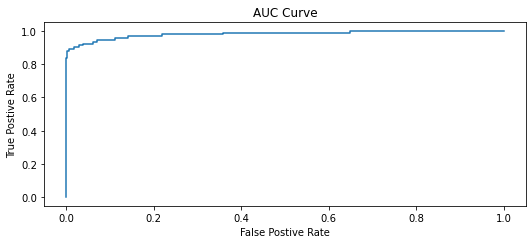

In [151]:
pos_probs=logreg.predict_proba(x_test)[::,1]
fpr,tpr,thresold=roc_curve(y_test,pos_probs)
plt.plot(fpr,tpr)
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('AUC Curve')



In [152]:
roc_auc_score(y_test,pos_probs)

0.9810400928047986